# Exploratory Data Analysis: AMES House Prices Dataset
## Presented at the School of AI Irving, TX
#### Prepared by Rene M. Pineda

## Introduction
Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA is utilized for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In my opinion, EDA is sometimes neglected in the data science workflow. In my experience, taking your time to perform EDA and document your findings is extremely valuable: it will more often than not make a huge difference in the accuracy of your predictions, and will help you communicate your insights and results to your audience.

![workflow.jpg](img/workflow.jpg)        

#### What will you get from investing time in EDA?

* You will increase the predictive ability of your model by providing it with good features
* You will deal with problems in your data, such as null values and missclasified features
* You will gain a better understanding of your data that can help you in later steps, such as selecting and refining your model
* You will develop a good story and visualizations to support the comunication of your results

# Contents:

* 1. Understand the problem and formulate hypotheses

* 2. Quick exploration of the data
   * 2.1 Explore the data set
   * 2.2 Explore the target variable
          * 2.2.1 Distribution plot
          * 2.2.2 Variable transformation
          * 2.2.3 Identifying outliers

* 3. Distribution plots
    * 3.1 Distribution of numeric variables
    * 3.2 Distribution of categorical variables
    * 3.3 Mixin-up numeric and categorical variables

* 4. Analyzing correlations
    * 4.1 Scatterplots
    * 4.2 The correlation matrix

* 5. Handling missing data
    * 5.1 Identifying missing values
    * 5.2 Imputation

* 6. Feature Engineering
    
* 7. Ideas for further exploration

## Understand the problem and generate hypothesis

**Problem:** predict house prices based on house features.

It is usually very useful to familiarize yourself with the problem by doing some research, reading the data documentation, or talking to a SME. In this case, and although I've never bought a house, I've watched my fair share of 'Love it or List it', 'Property Brothers' and 'Caribbean Life'. Based on this, I will generate some hypotheses to have in mind during the EDA stage:
* House size, overall condition and location are the strongest predictors of the price of a house.
* The quality of the kitchen is a very valuable feature for many people
* There will be many correlated variables, for example: size of the house with garage size and number of bedrooms, kitchen quality and overall quality.
* The real estate market is subject to bubbles and crashes which might influence the price of the house independently of its features. 

In this case we are all familiar with the problem, and therefore we feel confident when we approach the data. Train to gain the same confidence when approaching more complex data sets.

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats # for the QQ plot
import calendar # for variable transformation

# Allow the charts to show directly into the notebook
%matplotlib inline

# Disable "deprecation" warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
#Load the data
houses = pd.read_csv('data/train.csv')

## 1. Quick exploration of the data:
* Get a sense of the general look of the data
* Check the number of variables (columns) and sample size (rows)
* Get a first glance of whether NAs might be a problem
* Understand which variables are numerical and which ones categorical
* Understand the distribution of the variables

### 1.1 Explore the whole data set
Even a basic action such as listing the variables will reveal a lot of information.

In [3]:
# Use the info method to list all variables:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

See how much information you can get from this simple step!

It's always useful to get a sense of how the data actually looks like by looking at a sample:

In [4]:
#Set up the notebook to see all the columns from the data frame:
pd.set_option('display.max_columns',90)

# Read the table
houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

Python makes it easy to summarize the numeric variables:

In [5]:
#Summary Statistics
houses.describe(include=[np.number])


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Explore the target variable
### 2.2.1 Distribution Plot

Text(0.5,0,'Prices in US Dollars')

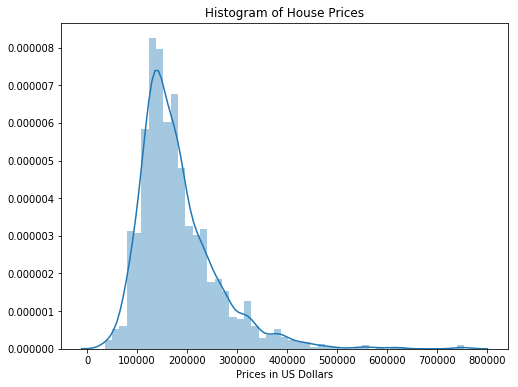

In [6]:
# Histogram of the response variable

#Create the "frame" for the chart
fig, axes = plt.subplots(figsize=(8,6))
#Use Seaborn to create the histogram and label your chart:
sns.distplot(houses['SalePrice'], kde=True, norm_hist=True)
axes.set_title('Histogram of House Prices')
axes.set_xlabel('Prices in US Dollars')


# Adding vertical lines for the mean and median



### Description of the distribution

* This distibution has several names: skewed to the right, long-tailed, positively skewed
* Explanation: there are only a few houses with very high prices
* This is common in distribution for variables such as income (think of salaries), loans, time of a customer service call.

![skewness.jpg](img/skewness.jpg)

### Optional discussion: When is it required to have a normal distribution for the response variable?
* Some predictive models will make strong assumptions about the distribution of the response variable.
* For example, linear regression will assume that for each level of the features, the response variable will be sampled from a normal distribution
* Hypothesis testing for coefficients or differences in means will also make an assumption about normality
* Other models, however, have less restrictive assumptions. In that case we don't need to care about this distribution

I've seen a lot of confusion around this topic, and many people seem to be concerned about the normality of their data. IMO, this is caused by the extensive coverage that statistics courses give to hypothesis testing, confidence intervals and linear regression, where normality assumptions are critical (although the estimators are robust, which means that they will be unbiased with a sufficiently large data set, even if the data doesn't "look" normal!). The professor never informs us when to stop worrying about normality.
* Some people are concerned about the normality of the features, even though most features will never have a normal distribution! (think of neighborhood, garage space, kitchen quality, year remodeled, etc.)
* Normal distribution of the *residuals* is a very important assumption for the linear regression model. 
* Example of the confusion caused by this topic: worrying about making data "look normal" for a Boosting algorithm, when it doesn't make any assumptions about normality [Do I need normal data for my model?](https://tinyurl.com/y8vhuvkz)

Solution: know your algorithms. Learn which assumptions they make about your data, and prepare (pre-process) it accordingly. 

In case you want to be rigurous about testing the normality of your data, there are many tools for that, both analytical and those that rely on visual inspection. QQ plots are among the most useful. They plot the actual normalized data against a theoretical normal distribution:

Text(0.5,1,'House Sale Prices - Normal Q-Q plot')

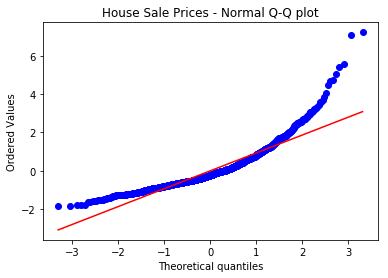

In [7]:
# QQ Plot with untransformed variable
scaled_Prices = preprocessing.scale(houses['SalePrice'])
stats.probplot(scaled_Prices, dist="norm", plot=plt)
plt.title("House Sale Prices - Normal Q-Q plot")

### 2.2.2 Variable Transformation
There is a couple of things we can try if we want the response variable to approximate a normal distribution. For example, we can apply a 'log transformation', which will reduce the skewness of the data, and make the linear relationship with features stronger. 

In [8]:
# Transform the variable to the natural logarithm of the sale price
houses['LogSalePrice'] = np.log(houses['SalePrice'])

In [ ]:
#Create the "frame" for the chart

#Create the histogram for the transformed variable


Text(0.5,1,'Log House Sale Prices - Normal Q-Q plot')

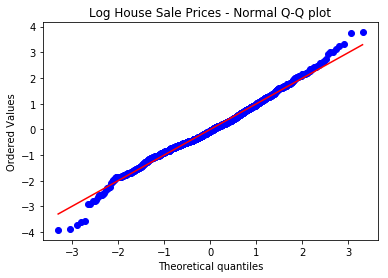

In [9]:
## QQ plot with transformed variable

# QQ Plot
scaled_logPrices = preprocessing.scale(houses['LogSalePrice'])
stats.probplot(scaled_logPrices, dist="norm", plot=plt)
plt.title("Log House Sale Prices - Normal Q-Q plot")

In [ ]:
# Drop the log transformed variable
houses.drop('LogSalePrice', axis=1, inplace=True)


### 2.2.3 Identifying outliers

We generally define outliers as samples that are exceptionally far from the mainstream of data.There is no rigid mathematical definition of what constitutes an outlier; determining whether or not an observation is an outlier is ultimately a subjective exercise.

What is the problem of outliers? The presence of outliers is a violation of fundamental assumptions in some statistical models. They may produce biased estimators and increase the error variance, which will in turn affect the quality of your predictions and reduce the power of statistical tests. See the following illustrative example where the presence of one outlier greatly affects the estimated coefficient:

![outlier.png](img/outlier.png)  

What causes outliers? Outliers can be un-natural or artificial, caused by measurement errors, data entry errors, bad experiment designs, etc. However, there could also be natural outliers that contain useful information about extreme values of the data.

How to detect outliers? Outliers can be detected by simple inspection of the data, using boxplots, histograms, etc. If we assume that the data has a given distribution, we can also detect outliers by transforming the data to fit the distribution and identify extreme values. See the examples below.

There are more rigurous mathematical methods to detect and handle outliers. If you're performing linear regression, you should analyze the Leverage and Cook's D values for the residuals, which will reveal if the outliers have an impact on your estimators. Other methods include proximity-based models (clustering), linear models that map the data to lower dimensional spaces (such as PCA), and specific methods to handle outliers in a multivariate context. 

Should outliers be removed from the data? I've seen many approaches to this. Some experienced data scientists will remove data points after simple visual inspection. Because of my background, I'm very hesitant to remove outliers, and will usually try to perform 2-3 tests before deciding. Take into account that they might contain valuable information about your data. Maybe it's better to keep the outliers and try other techniques such as binning or transforming the data. 


#### Univariate outliers
This refers to identifying outliers in the distribution of a single variable, for example the Sale Price. 

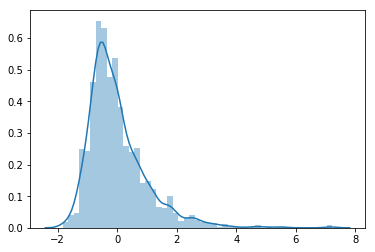

In [10]:
#Standardize the variable to a normal distribution, transforming to Z-scores
scaled_Prices = preprocessing.scale(houses['SalePrice'])

# Plot the data for visual inspection
sns.distplot(scaled_Prices)

In [11]:
# Identify those data points that are 3 or more standard deviations away from the mean
scaled_Prices[abs(scaled_Prices) > 3]

array([3.24696665, 4.04098249, 3.70305009, 3.226492  , 3.08604046,
       4.71041276, 3.26232893, 3.1364086 , 3.34116765, 3.41280373,
       3.04826436, 7.22881942, 4.49634819, 3.82897043, 5.06214602,
       5.42383959, 4.73032076, 3.07181146, 5.59185509, 7.10289909,
       3.57712976, 3.59601781])

### Multivariate outlier detection

In this case we're taking more than one variable into account to detect outliers. For example, we can try to detect outliers of the Sale Price taking into account the size of the house.

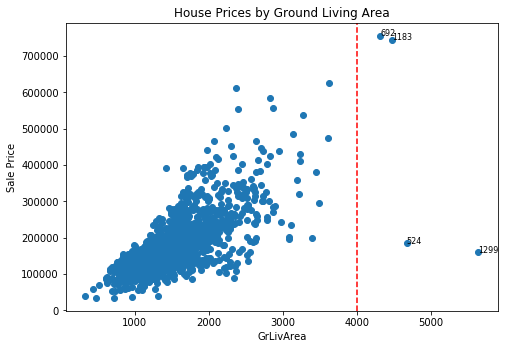

In [12]:
# Create a plot of Sale Price vs. Living Area
fig = plt.figure()
axes = fig.add_axes([1,1,1,1])
x = houses['GrLivArea']
y = houses['SalePrice']
Id = houses['Id']
axes.scatter(x,y)
axes.axvline(x=4000, color = 'red', linestyle = '--' )
axes.set_xlabel('GrLivArea')
axes.set_ylabel('Sale Price')
axes.set_title('House Prices by Ground Living Area')

#Label the houses that are bigger than 4,000 sq. ft.:
for i, house in enumerate(Id):
    if x[i] > 4000:
        axes.annotate(house, (x[i],y[i]), fontsize = 8)


We center our attention on the four largest houses, two of which seem to be undervalued. Let's investigate if there's any reason their price is so low by listing some features on the houses with GrLivArea greater than 4,000 sq. ft.:

In [13]:
houses.iloc[[691,1182,523,1298],][['Id','GrLivArea','SalePrice','OverallQual','OverallCond','YearBuilt','GarageCars','PoolQC','SaleCondition']]

,Id,GrLivArea,SalePrice,OverallQual,OverallCond,YearBuilt,GarageCars,PoolQC,SaleCondition
691,692,4316,755000,10,6,1994,3,NaN,Normal
1182,1183,4476,745000,10,5,1996,3,Ex,Abnorml
523,524,4676,184750,10,5,2007,3,NaN,Partial
1298,1299,5642,160000,10,5,2008,2,Gd,Partial


It definitely looks like the houses were in good condition and fairly new, although the sale condition 'Partial' indicates that the home was not completed. We should keep them in mind for further investigation.

## 3. Distribution Plots
At the core of EDA is the plotting of the data using the visualization capabilities of Python (matplotlib and seaborn). Apart from the following examples, make sure you check out the nice Gallery at https://seaborn.pydata.org/examples/index.html

### 3.1 Distribution Plots for numeric data
The most widely utilized chart types are histograms (for 1 variable), scatterplots (for comparison of two variables), and bars (for aggregations). We use them all in this notebook. One excellent capability of Python is the ability to get quick plots of all the numeric variables with pair plots.

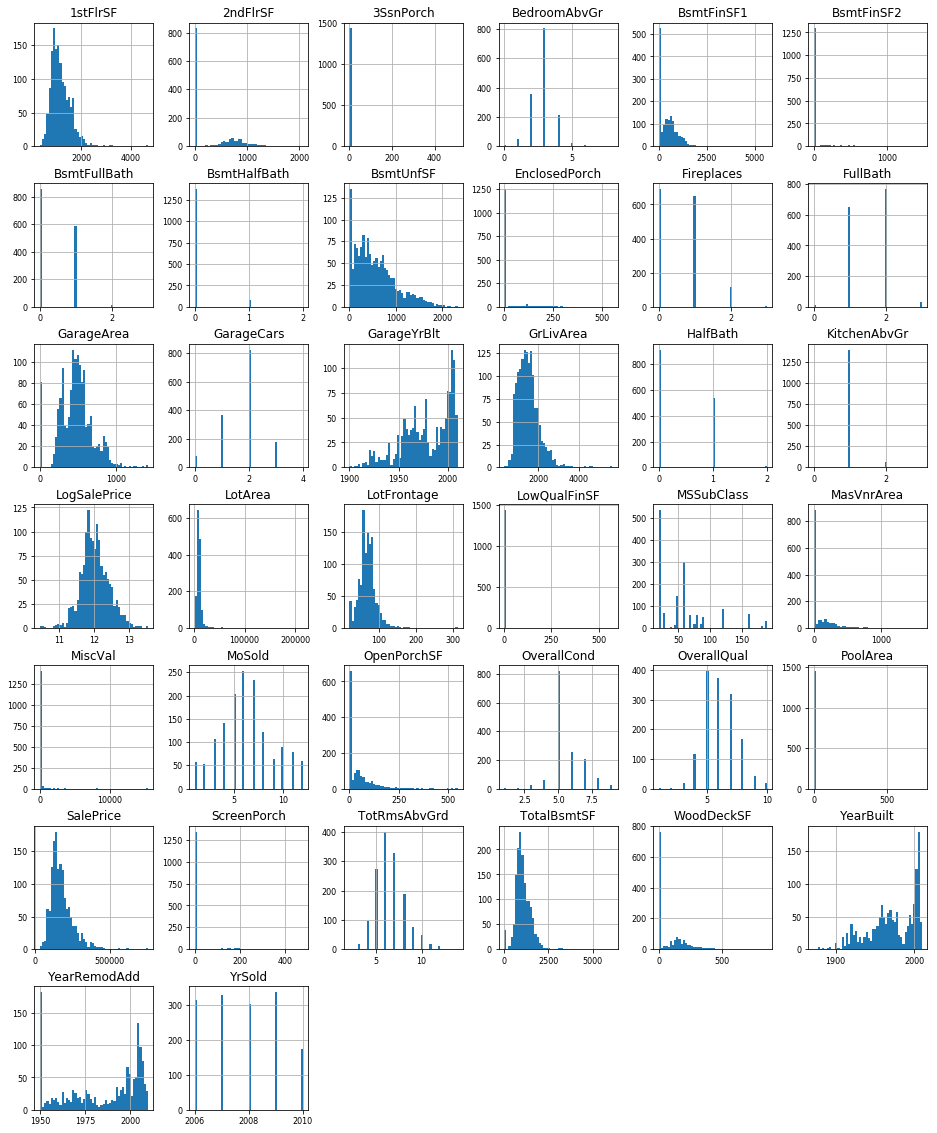

In [14]:
# Select only the numeric variables and put them into a data frame
df_numeric = houses.select_dtypes(include = ['float64', 'int64'])
#Drop the ID variable
df_numeric = df_numeric.drop('Id', axis = 1)

#Plotting histograms of each variable
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Question: Which of these features do you consider actual numeric features? Which could be better described as 'categorical'?

### 3.2 Distribution Plots for categorical data

Describe the distribution of House Prices by Neighborhood using a boxplot, also called a box-and-whisker plot

Text(0.5,1,'Distribution of House Prices by Neighborhood')

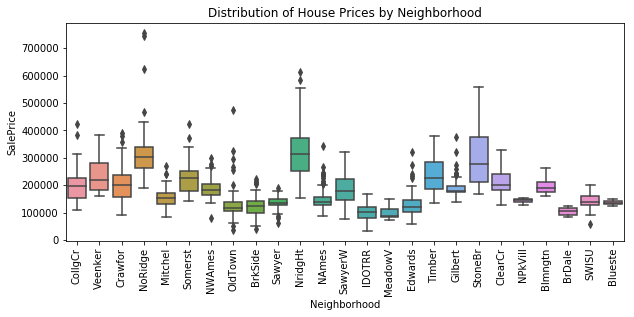

In [15]:
f, ax = plt.subplots(figsize=(10, 4))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=houses)
plt.xticks(rotation=90)
ax.set_title('Distribution of House Prices by Neighborhood')

We can see that the price distribution varies quite a bit from one neighborhood to the other, which means that Neighborhood is probably a good predictor. Features that have a lot of variability are usually good predictors.

We can try different types of plots and assess the advantages and disadvantages of each:

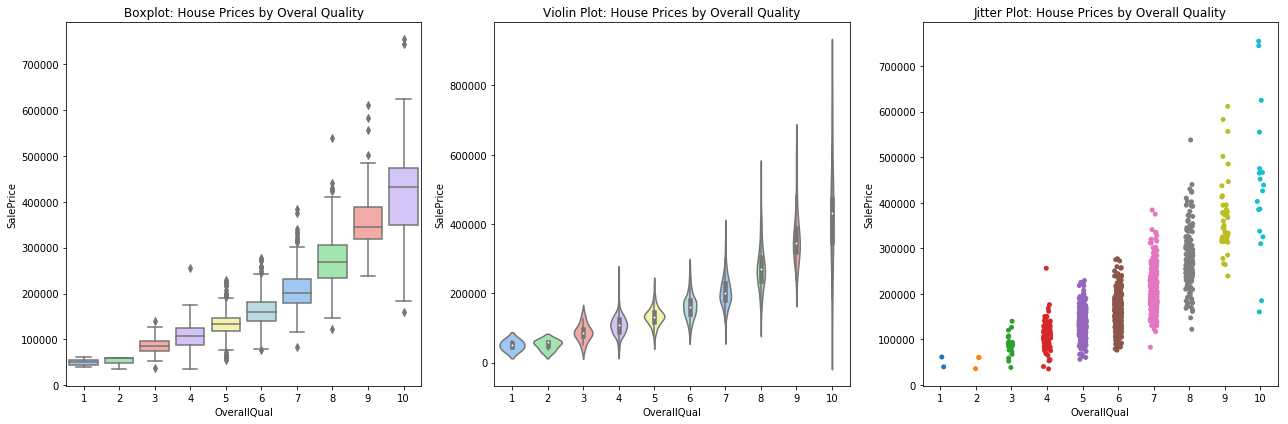

In [16]:
# Overall Quality of the house vs. Sale Price
# Set up the layout for the plots:
f, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize=(18, 6))
# Create the box plot
sns.boxplot(x='OverallQual', y='SalePrice', data=houses, palette = 'pastel', ax=ax1)
ax1.set_title('Boxplot: House Prices by Overal Quality')

#Create the dot plot:
sns.violinplot(x='OverallQual', y='SalePrice', data=houses, palette = 'pastel', ax=ax2)
ax2.set_title('Violin Plot: House Prices by Overall Quality')

# A nicer jitter plot (or stripplot):
sns.stripplot(x='OverallQual', y='SalePrice', data=houses, ax=ax3, jitter = True) # We use jitter to bring out the distribution of the data
ax3.set_title('Jitter Plot: House Prices by Overall Quality')

f.tight_layout()

Inspecting the 'Kitchen Quality' Feature.

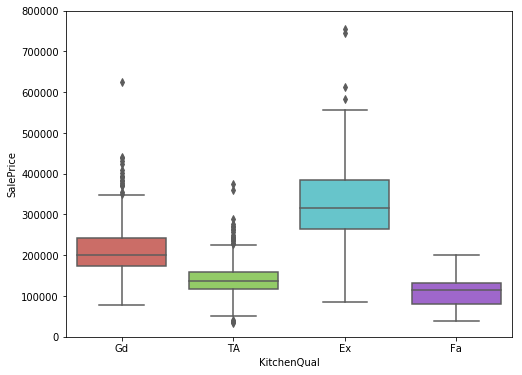

In [17]:
# Overall Quality of the kitchen vs. Sale Price

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='KitchenQual', y="SalePrice", data=houses, palette='hls')
fig.axis(ymin=0, ymax=800000);

Keep in mind that Kitchen Quality might be correlated to other variables such as Overall Quality. We can use a bar plot to estimate the average quality of the house for each category of KitchenQual:

Text(0.5,1,'Average Overall Quality by level of Kitchen Quality')

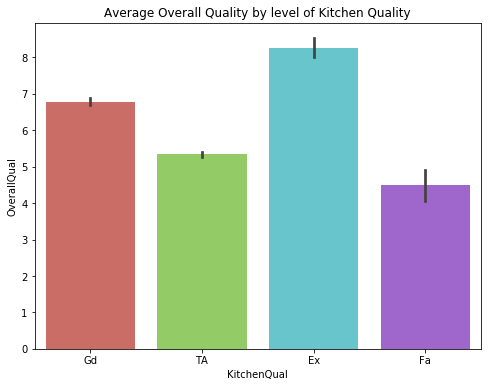

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='KitchenQual', y='OverallQual', data=houses, palette = 'hls') # The default aggregation is the mean value for each category
ax.set_title('Average Overall Quality by level of Kitchen Quality')

If you'd remember only one chart from this notebook, it should be the following one, because it's the most useful in my opinion:

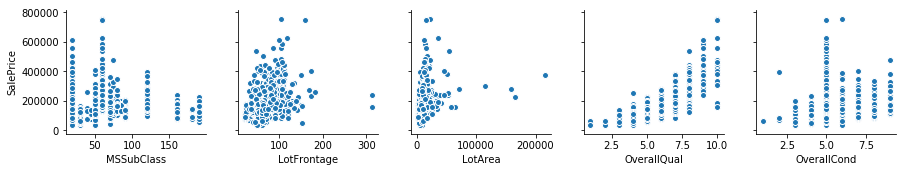

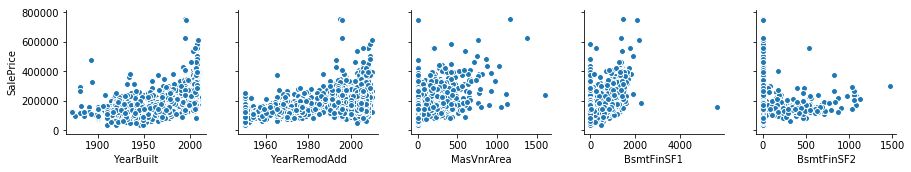

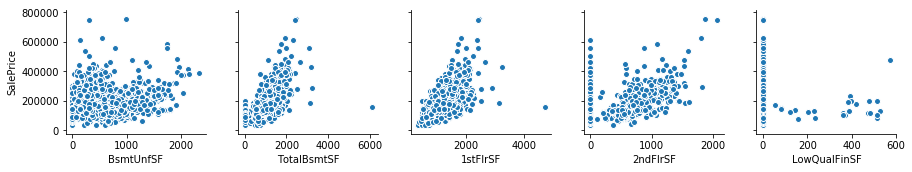

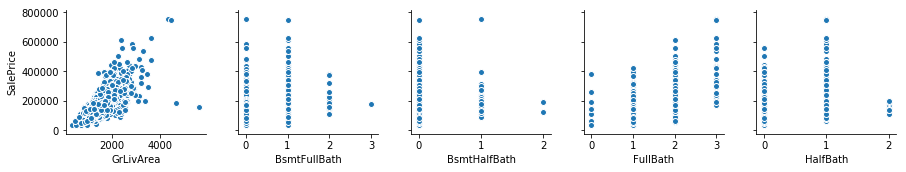

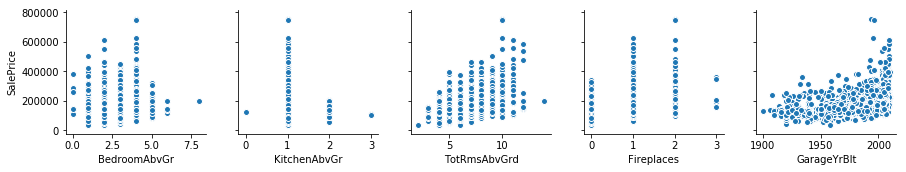

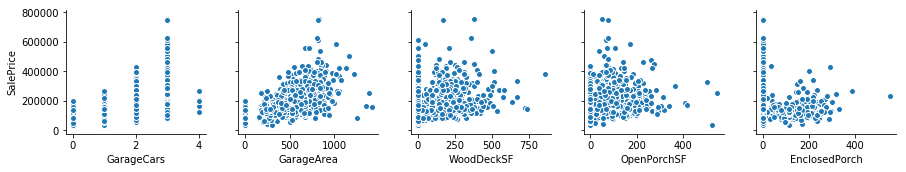

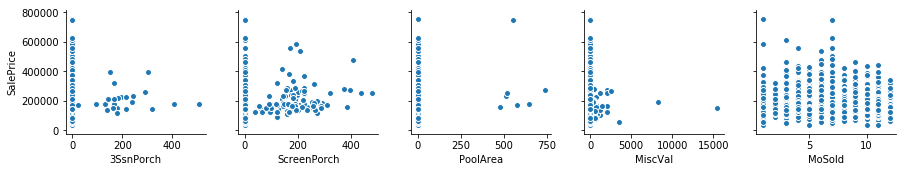

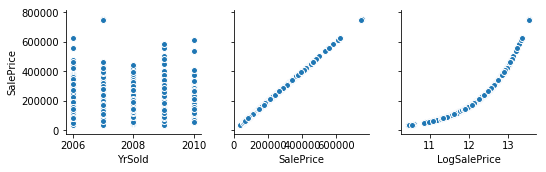

In [19]:
# Plotting the relationship of each numeric feature with Sales Price. 
for i in range(0, len(df_numeric.columns), 5):
    sns.pairplot(data=df_numeric,
                x_vars=df_numeric.columns[i:i+5],
                y_vars=['SalePrice'])

### 3.3 Mixing-up categorical and numerical features

Many datasets identify categorical data as numeric, simply because of how the data is entered into the database. Before we run a model, we have to make sure that this features are converted to categorical, in order to ensure that our model will consider them appropiately.

We have a clear example in our dataset: Year and month are identified as numeric, when they are categorical. Let's explore the variables.

#### Did the 2008 crisis have an impact on house prices and sales?
We can explore the time variables in several ways. First, observe if there is a downward trend in house prices:

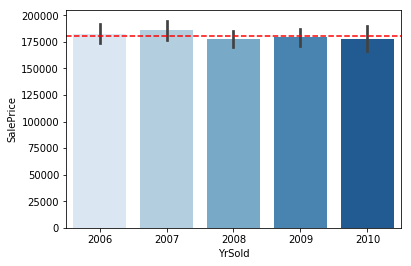

In [20]:
# Create a barplot wit the mean price of the houses for each year
sns.barplot(x='YrSold', y='SalePrice', data=houses, palette='Blues')

#Plot the mean overall price
plt.axhline(y=houses['SalePrice'].mean(), color = 'red', linestyle = '--' )

We can see a slight decrease in prices starting in 2008. If we had robust evidence that the crisis caused an impact on prices (for example by doing a multivariate ANOVA test), we could even consider creating a dummy variable 'Crisis', equal to 0 from 2006 to Nov 2008, and equal to 1 from Dec 2008 onwards. We could test afterwards if this variable helps the predictions to be more accurrate. This type of experimental mindset is helpful when performing EDA. 

#### Is there any seasonality? When do people buy houses? How do prices vary?

In [21]:
# Create a concatenated variable to have Yr and Month for each sale
month_year = pd.concat([houses['MoSold'], houses['YrSold']], axis=1)

#Before creating the heat map, we need to create two pivot tables with number of houses sold and average prices for each month
numbersold_heat_map = month_year.pivot_table(index = 'MoSold', columns='YrSold', aggfunc=np.count_nonzero)
price_heat_map = houses.pivot_table(index = 'MoSold', columns='YrSold', values='SalePrice', aggfunc=np.mean)

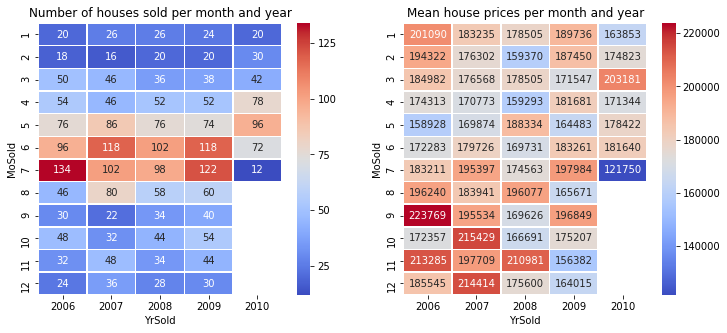

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (12,5))
ax1.set_title('Number of houses sold per month and year')
ax2.set_title('Mean house prices per month and year')
sns.heatmap(numbersold_heat_map, cmap='coolwarm', ax=ax1, annot=True, fmt = "g",annot_kws={"size":10}, linewidths=0.5)
sns.heatmap(price_heat_map, cmap = 'coolwarm', ax=ax2, annot=True, fmt='g', linewidths=0.5)


## 4. Analyzing correlations

This step is important because it adds a degree of mathematical formality to our analysis, which so far has been mostly intuitive. We're going to find the linear (Pearson) correlation between the numerical features and the Sale Price. 

#### Possible values for the linear correlation coefficient:

<img src="img/correlation.jpg" height = 345 width = 500>

### 4.1 Scatterplots

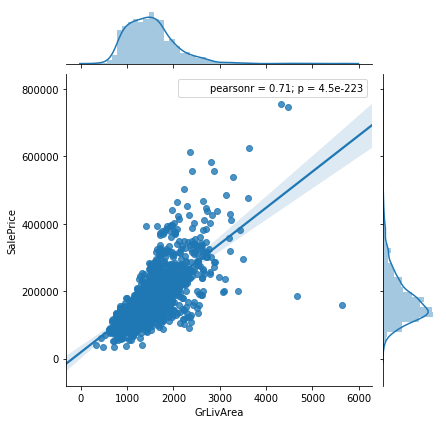

In [23]:
# We can analyze linear correlation using scatterplots
sns.jointplot(x='GrLivArea',y='SalePrice',data=houses,kind='reg')

### 4.2 Correlation Matrix
We will calculate the correlation matrix between the numerical variables in order to identify:
* The features that have the larges correlation with the Sales Price target value
* Possible correlation between features, which is something we'd have to take into account to ensure that our model works well

In [ ]:
#How many numeric variables are there? 39 in total


In [24]:
# calculate the correlation matrix
corr = round(houses.corr(),2) # the number 2 is only to round up the values to 2 decimals

#Sort the values from highest to lowest, and then select the top 10 variables
# order_corr = corr.reindex(corr.SalePrice.abs().sort_values().index)

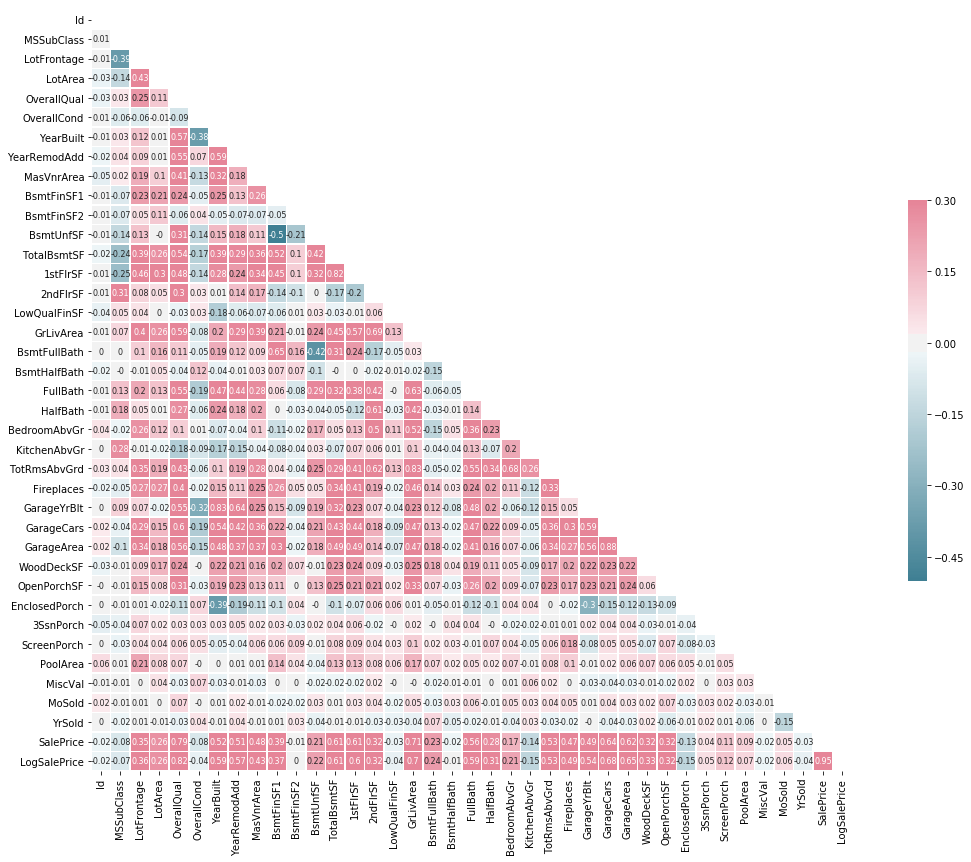

In [25]:
# We can use a heatmap type chart to have a better visualization:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 5, as_cmap=True)

# Use a mask to cover the upper right part of the matrix (which contains duplicate values)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"size":8})

#### Multicollinearity

Multicollineary occurs when many features are strongly correlated with each other, as it is the case here. Depending on your predictive model, this can cause many problems. For example, in linear regression, it will seriously affect your regression coefficients, even giving you 

Multicollinearity is something that has to be dealt with, either carefully selecting your features to avoid using reduntant information, or using methods that handle multicollinearity well (e.g. XGBoost).

## 5. Handling Missing data:

### 5.1 Identify null values:
* Check which variables have null values, and determine the probable reasons for that
* Decide what to do with null values among several options:
    - Categorical imputation
    - Imputation based on the distribution of the data (mean, median, mode)
    - Delete instances
    - Try to predict what the null value data point should be, based on other features in the data set. 
* This is usually done on a case-by-case basis, and it usually requires examining the data in detail

#### List all variables that contain NAs

In [26]:
# List all the variables that have NA values:
NA = houses.isnull().sum().sort_values(ascending = False)
NA[NA>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageCond        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### 5.2 Imputation of data

#### Simple cases of imputation
The variable with the largest number of NAs is PoolQC. Check the content of the PoolQC variable: 

In [27]:
# The value_counts method is very useful for describing categorical variables: 
houses['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [28]:
#Assign 'No Pool' Category to NA's:
houses['PoolQC'].fillna('No Pool', inplace = True)
houses['PoolQC'].value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [29]:
# Another variable with many NAs is Alley. The documentation says that there is no alley access to the property. 
houses['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [30]:
houses['Alley'].fillna('No Alley', inplace = True)
houses['Alley'].value_counts(dropna=False)

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

#### The Garage variables
There are 7 variables that have to do with Garage, and we can see that 5 of them have 81 NA values. We have to investigate what is happenning and fix them as a group.

In [31]:
# First, it makes sense to impute GarageYrBlt with the same year the house was built.
houses['GarageYrBlt'].fillna(houses['YearBuilt'], inplace = True)
houses['GarageYrBlt'].isnull().sum()

0

For GarageQual, GarageCond, GarageType, and GarageFinish, we can do more detailed research to impute a sensible value. 
A sensible and commonly utilized approach is to fill the value with the most common occurrence. For example:

In [32]:
# Use value_counts to find the most common category
houses['GarageType'].value_counts(dropna = False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [33]:
houses['GarageType'].fillna('Attchd', inplace = True)
houses['GarageType'].value_counts(dropna = False)

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

## 6. Feature Engineering

Feature Engineering can be defined as **"Extracting more data from the data you already have"**. It's waaaay more an art than a science, and although there are advanced tools that automate this process (https://tinyurl.com/ybfctfav), it's better to experiment and gain more practice before using them.

Remember 3 characteristics of good features:

1. **Informative**: does the feature actually correlates with the target variable? Avoid useless features that may actually hurt your algorithm.
2. **Independent**: is the feature independen from the others? Try to remove highly correlated features, to avoid double counting
3. **Simple**: is the feature easy to understand? Ensure that your variables present the data in a clean, easy to understand way.

### How many bathrooms does the house actually have?
There are four variables in the dataset that refer to the number of bathrooms. Following the principles stated above, create only one variable that contains this information.

In [34]:
# Extract the bathroom variables
Bathrooms = houses[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']] 

AttributeError: 'AxesSubplot' object has no attribute 'tight_layout'

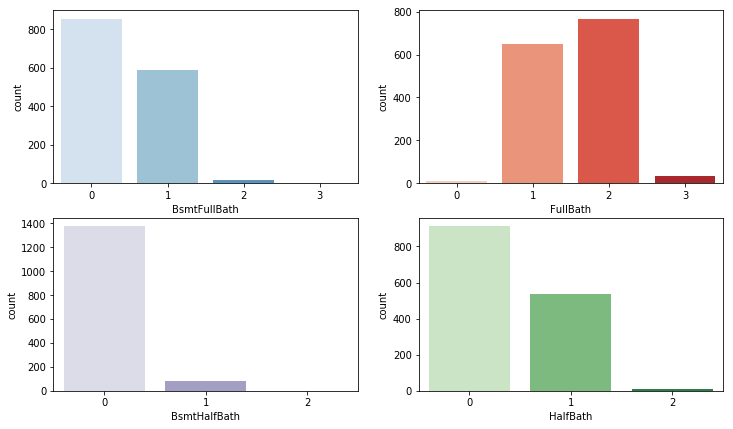

In [35]:
#Create four bar plots to analyze the variables
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, sharey=False, figsize = (12,7))
sns.countplot('BsmtFullBath', ax= ax1[0], data = houses, palette='Blues')
sns.countplot('BsmtHalfBath', ax = ax2[0], data = houses, palette = 'Purples')
sns.countplot('FullBath', ax= ax1[1], data = houses, palette = 'Reds')
sns.countplot('HalfBath', ax = ax2[1], data = houses, palette='Greens')
fig.tight_layout()

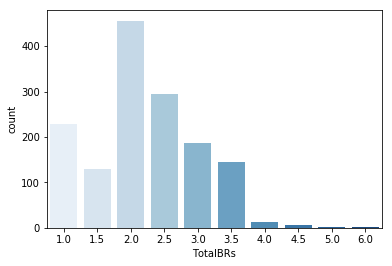

In [36]:
# Create one variable that contains the information about the number of bathrooms:
#Full bathroom counts as 1 , Half bathroom counts as 0.5 
houses['TotalBRs'] = houses['BsmtFullBath'] + houses['FullBath'] + 0.5*(houses['BsmtHalfBath'] + houses['HalfBath'])
sns.countplot('TotalBRs', data = houses, palette = 'Blues')



Compare this bar chart with the 4 plots we created before. Which one is easy to interpret? If it's easier for you, it's easier for your model, too.

### How old is the house?
Again, think about simplicity and usefulness of the data. What is easier to understand and interpret, and has more predictive power?:
- "This house was built in 1973 and sold in 2008"
- "This house is 35 years old"

We will create a new variable to determine how old the house was at the moment of selling.

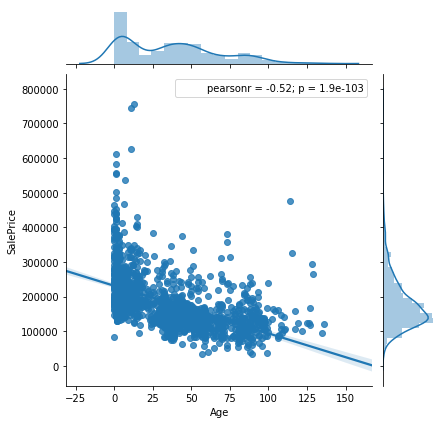

In [37]:
# Create the 'Age' variable
houses['Age'] = houses['YrSold'] - houses['YearBuilt']
sns.jointplot(x='Age',y='SalePrice',data=houses,kind='reg')

As a result, we have created a new variable which probably has good predictive power! We could improve this even more by creating a binomial feature to identify a house as 'Brand New' (notice the high number of points close to zero)

## Some ideas for further exploration:

**Data exploration** 
* Create plots to explore the relationships between the following variables:
    - MSSubclass and SalePrice
    - GarageCars and Garage Area

* Do you think that the feature 'Utilities' is important to predict house prices?  What about HouseStyle? Use data descriptions/plots to answer. 

**Imputation of Null Values**
* Complete the imputation of values for the Fireplace Quality feature, taking into account the 'Fireplaces' data.
* Complete the imputation of values for the Basement features that contain NAs.


**Correlation**
* What would you do with the features that show strong correlations amongst themselves?
* If you wanted to keep the variables, what kind of predictive model would you use?

**Feature Engineering**
* Create a feature that indicates (approximately) whether a house is new. Do you think that people pay a premium for buying a brand new house? Use plots to determine if this feature could be a useful predictor.
* Convert the Month feature to a categorical variable. 